In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
#Import API key

from api_keys import api_key
temp_units = "imperial"

In [3]:
#Citipy to determine city based on latitude and longitude

from citipy import citipy

In [4]:
#Output file in csv format

output_data_file = "weather_cities.csv"

In [5]:
#Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#Define URL

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [7]:
#Set pass throughs

count_one = 0
set_one = 1

In [8]:
#Generate Cities List:
#List for holding lat_lngs and cities

lat_lngs = []
cities = []

#Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify the nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count

len(cities)

590

In [9]:
#Perform API Calls
#Lists for dataframe

city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

#Quantities for organization

count_one = 0
set_one = 1

#To loop

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | labuhan
City not found. Skipping...
Processing Record 4 of Set 1 | ukiah
Processing Record 5 of Set 1 | boguchany
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | lakhimpur
Processing Record 12 of Set 1 | bonthe
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | fare
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | port alfred
City not found. Skipping...
Processing Record 18 of Set 1 | contamana
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | kloulklubed
City not found. Skipping...
Processing Record 23

Processing Record 41 of Set 4 | lalibela
City not found. Skipping...
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | krasnyy chikoy
Processing Record 44 of Set 4 | kamenka
Processing Record 45 of Set 4 | itaqui
Processing Record 46 of Set 4 | kahului
City not found. Skipping...
Processing Record 47 of Set 4 | formoso do araguaia
Processing Record 48 of Set 4 | finschhafen
City not found. Skipping...
Processing Record 49 of Set 4 | mayachnyy
City not found. Skipping...
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | puri
Processing Record 3 of Set 5 | rio gallegos
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | mahajanga
Processing Record 6 of Set 5 | moose factory
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | izazi
Processing Record 9 of Set 5 | sorland
Processing Record 10 of Set 5 | mehamn
Processing Record 11 of Set 5 | maku
City not found. Skipping...
Processing Record 12 of Set 5 | pu

Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | muli
Processing Record 34 of Set 8 | nouakchott
Processing Record 35 of Set 8 | san jose
Processing Record 36 of Set 8 | timiryazevskiy
Processing Record 37 of Set 8 | ferkessedougou
Processing Record 38 of Set 8 | raudeberg
City not found. Skipping...
Processing Record 39 of Set 8 | taltal
City not found. Skipping...
Processing Record 40 of Set 8 | weinan
Processing Record 41 of Set 8 | puerto colombia
Processing Record 42 of Set 8 | neyshabur
Processing Record 43 of Set 8 | manacapuru
Processing Record 44 of Set 8 | rincon
Processing Record 45 of Set 8 | zhicheng
Processing Record 46 of Set 8 | dwarka
Processing Record 47 of Set 8 | toamasina
Processing Record 48 of Set 8 | bom jesus
Processing Record 49 of Set 8 | kingman
Processing Record 1 of Set 9 | kaitangata
City not found. Skipping...
City not fo

In [10]:
#Dictionary for dataframe

weather_dict = {
"City":city_two,
"Cloudiness":cloudinesses,
"Country":countries,
"Date":dates,
"Humidity":humidities,
"Lat":lats,
"Lng":lngs,
"Max Temp":max_temps,
"Wind Speed":wind_speeds
}

In [11]:
#Create dataframe

weather_cities_dataframe = pd.DataFrame(weather_dict)

In [12]:
#Display the dataframe with first 5 samples

weather_cities_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,94,IN,1562606954,85,15.34,74.49,78.94,11.88
1,tuktoyaktuk,75,CA,1562606955,81,69.44,-133.03,46.40,4.70
2,labuhan,0,ID,1562606955,91,-2.54,115.51,68.32,1.88
3,ukiah,1,US,1562606955,55,39.15,-123.21,69.01,5.82
4,boguchany,30,RU,1562606955,71,58.38,97.46,57.16,2.51


In [13]:
#Convert Raw Data to Dataframe:
#Export the city data into a .csv file

weather_cities_dataframe.to_csv(output_data_file)

In [14]:
#Find out the count

weather_cities_dataframe.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

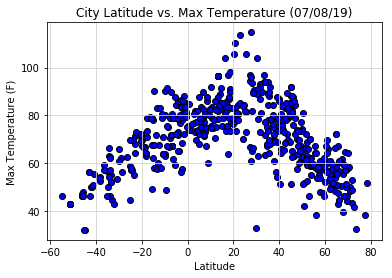

In [15]:
#Plotting the Data
#City Latitude vs. Max Temperature - plotting and saving figure as a .png file

plt.scatter(weather_cities_dataframe["Lat"],weather_cities_dataframe["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_temp.png")
plt.show()

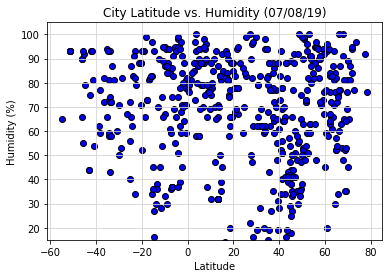

In [16]:
#City Latitude vs. Humidity - plotting and saving figure as a .png file

plt.scatter(weather_cities_dataframe["Lat"],weather_cities_dataframe["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_humid.png")
plt.show()

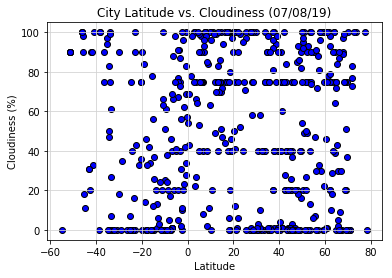

In [17]:
#City Latitude vs. Cloudiness - plotting and saving figure as a .png file

plt.scatter(weather_cities_dataframe["Lat"],weather_cities_dataframe["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_cloud.png")
plt.show()

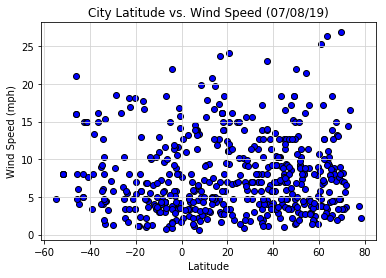

In [18]:
#City Latitude vs. Wind Speed - plotting and saving figure as a .png file

plt.scatter(weather_cities_dataframe["Lat"],weather_cities_dataframe["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_wind.png")
plt.show()